# Instance Normalization:The Missing Ingredient for Fast Stylization
# 实例规范化:快速格式化所缺少的元素

# Abstract
# 摘要



It this paper we revisit the fast stylization method introduced in Ulyanov et al.(2016). We show how a small change in the stylization architecture results in asignificant qualitative improvement in the generated images. The change is limited to swapping batch normalization with instance normalization, and to applythe latter both at training and testing times. The resulting method can be used totrain high-performance architectures for real-time image generation. The code isavailable at https://github.com/DmitryUlyanov/texture_nets. Full paper can be found at https://arxiv.org/abs/1701.02096.

本文重新讨论了乌里扬诺夫等人(2016)引入的快速风格化方法。我们展示了风格化架构中的一个小的变化如何导致生成的图像在质量上有了显著的改进。更改仅限于将批处理规范化与实例规范化交换，并在训练和测试时应用后者。该方法可用于训练用于实时图像生成的高性能体系结构。代码可以在https://github.com/DmitryUlyanov/texture_nets找到。全文可以在https://arxiv.org/abs/1701.02096找到。





# 1 Introduction

# 1介绍


The recent work of Gatys et al. (2016) introduced a method for transferring a style from an imageonto another one, as demonstrated in fig. 1. The stylized image matches simultaneously selectedstatistics of the style image and of the content image. Both style and content statistics are obtainedfrom a deep convolutional network pre-trained for image classification. The style statistics are extracted from shallower layers and averaged across spatial locations whereas the content statistics areextracted form deeper layers and preserve spatial information. In this manner, the style statisticscapture the “texture” of the style image whereas the content statistics capture the “structure” of thecontent image.

Gatys et al.(2016)最近的工作介绍了一种将样式从一幅图像转移到另一幅图像的方法，如图1所示。样式化的图像同时匹配样式图像和内容图像的选定统计信息。样式和内容统计数据都来自于一个深度卷积网络，该网络预先训练用于图像分类。样式统计信息从较浅的层中提取，并在空间位置上进行平均，而内容统计信息则从较深的层中提取并保留空间信息。通过这种方式，样式统计信息获取样式图像的“纹理”，而内容统计信息获取内容图像的“结构”。



Although the method of Gatys et. al produces remarkably good results, it is computationally ineffi-cient. The stylized image is, in fact, obtained by iterative optimization until it matches the desiredstatistics. In practice, it takes several minutes to stylize an image of size 512 × 512. Two recentworks, Ulyanov et al. (2016) Johnson et al. (2016), sought to address this problem by learningequivalent feed-forward generator networks that can generate the stylized image in a single pass. These two methods differ mainly by the details of the generator architecture and produce results ofa comparable quality; however, neither achieved as good results as the slower optimization-basedmethod of Gatys et. al.

虽然Gatys等人的方法产生了非常好的结果，但它计算效率不高。风格化的图像实际上是通过迭代优化得到的，直到它与期望的统计值匹配。在实际操作中，对大小为512×512的图像进行风格化需要花费几分钟的时间。最近的两部著作，Ulyanov et al. (2016) Johnson et al.(2016)，试图通过学习等效前馈发电机网络来解决这个问题，该网络可以在一次传递中生成程式化的图像。这两种方法的区别主要在于生成器架构的细节和产生质量相当的结果;然而，这两种方法都没有Gatys等人基于缓慢优化的方法取得的效果好。

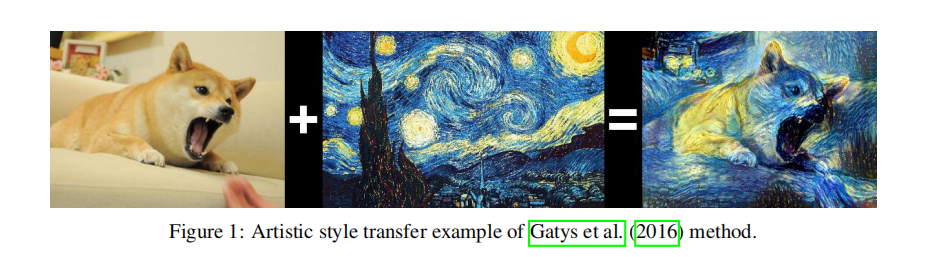
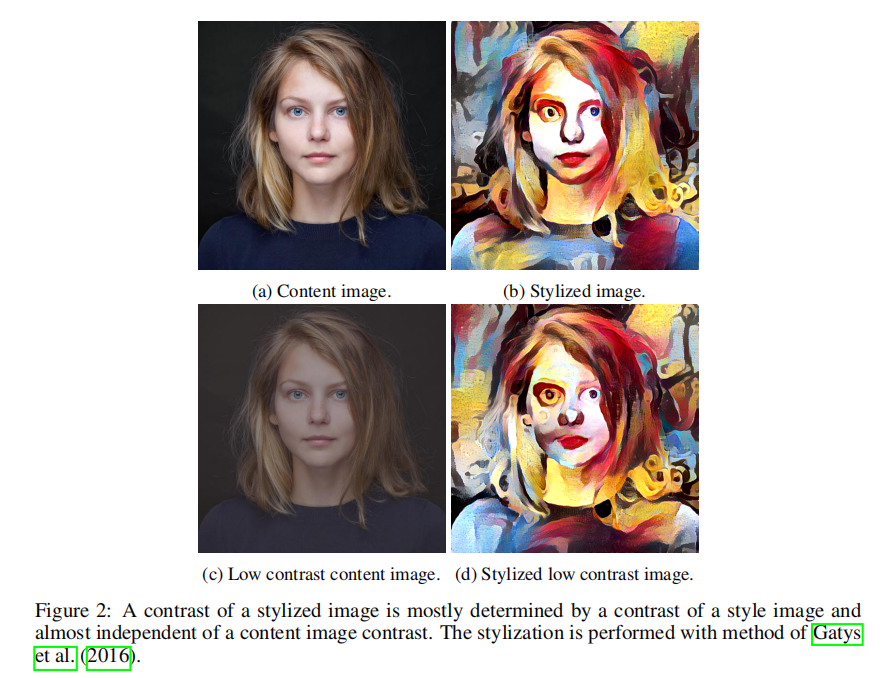

In this paper we revisit the method for feed-forward stylization of Ulyanov et al. (2016) and showthat a small change in a generator architecture leads to much improved results. The results are infact of comparable quality as the slow optimization method of Gatys et al. but can be obtained inreal time on standard GPU hardware. The key idea (section 2) is to replace batch normalization layers in the generator architecture with instance normalization layers, and to keep them at testtime (as opposed to freeze and simplify them out as done for batch normalization). Intuitively,the normalization process allows to remove instance-specific contrast information from the content image, which simplifies generation. In practice, this results in vastly improved images (section 3).

在本文中，我们重新讨论了乌里扬诺夫等人(2016)的前馈风格化方法，并证明了生成器架构中的一个小变化会带来很大的改进结果。结果与Gatys等人的慢速优化方法质量相当，但可以在标准GPU硬件上实时获得。关键思想(第2节)是用实例规范化层替换生成器体系结构中的批处理规范化层，并在测试时保持这些层(而不是像批处理规范化那样冻结和简化它们)。直观地说，规范化过程允许从内容映像中删除特定于实例的对比度信息，这简化了生成。在实践中，这将极大地改善图像(第3节)。






# 2 Method

# 2方法



The work of Ulyanov et al. (2016) showed that it is possible to learn a generator network g(x, z) thatcan apply to a given input image x the style of another x0, reproducing to some extent the resultsof the optimization method of Gatys et al. Here, the style image x0 is fixed and the generator g islearned to apply the style to any input image x. The variable z is a random seed that can be used toobtain sample stylization results.

Ulyanov等人(2016)的工作表明，可以学习一个可以应用于给定输入图像x的生成网络g(x, z)另一个x0的样式，这在一定程度上复制了Gatys等人的优化方法的结果。这里，样式图像x0是固定的，生成器g学习将样式应用于任何输入图像x。变量z是一个随机种子，可用于确定样本样式化结果。



The function g is a convolutional neural network learned from examples. Here an example is just acontent image xt, t = 1, . . . , n and learning solves the problem where zt ∼ N (0, 1) are i.i.d. samples from a Gaussian distribution. The loss L uses a pre-trainedCNN (not shown) to extracts features from the style x0 image, the content image xt, and the stylizedimage g(xt, zt), and compares their statistics as explained before.

函数g是从例子中学习到的卷积神经网络。这里的一个例子是一个帐篷图像xt, t = 1，…， n和learning解决了这个问题，其中zt∼n(0,1)是来自高斯分布的i.i.d样例。loss L使用一个预训练的cnn(未显示)从样式x0图像、内容图像xt和stylizedimage g(xt, zt)中提取特征，并像前面解释的那样比较它们的统计数据。

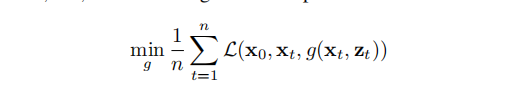
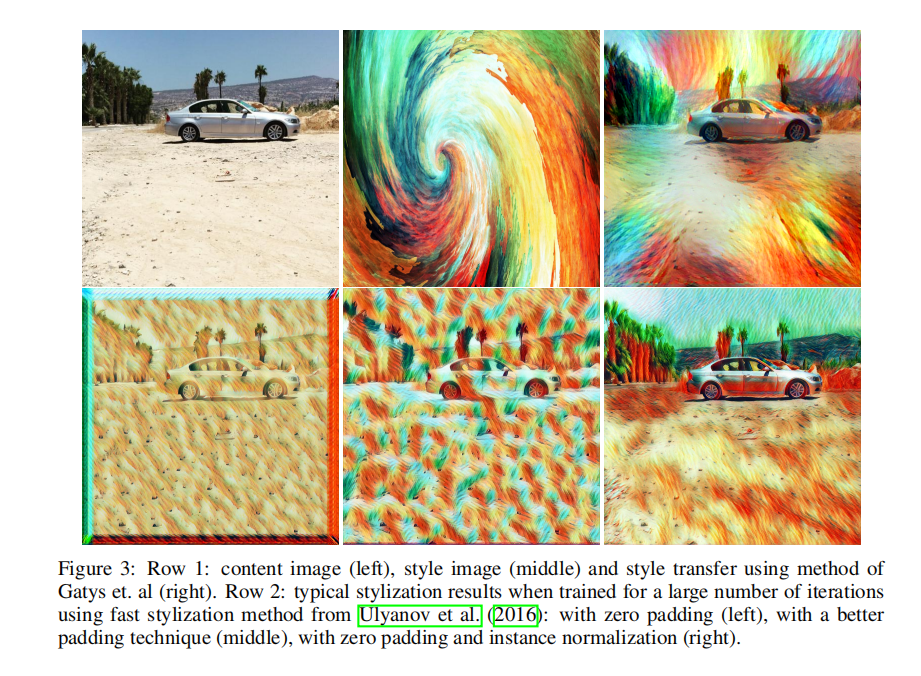

While the generator network g is fast, the authors of Ulyanov et al. (2016) observed that learning itfrom too many training examples yield poorer qualitative results. In particular, a network trained onjust 16 example images produced better results than one trained from thousands of those. The mostserious artifacts were found along the border of the image due to the zero padding added before everyconvolution operation (see fig. 3). Even by using more complex padding techniques it was not possible to solve this issue. Ultimately, the best results presented in Ulyanov et al. (2016) were obtainedusing a small number of training images and stopping the learning process early. We conjecturedthat the training objective was too hard to learn for a standard neural network architecture.

虽然发生器网络g是快速的，但乌里扬诺夫等人(2016)观察到，从太多的训练例子中学习它会产生较差的定性结果。特别是，一个只训练了16张样本图像的网络比训练了成千上万张样本图像的网络产生了更好的结果。最严重的伪迹是在每次卷积运算之前添加的补零导致的，即使使用更复杂的补零技术也无法解决这个问题。最终，乌里扬诺夫等人(2016)提出的最佳结果是通过使用少量训练图像和提前停止学习过程得到的。我们推测训练目标对于一个标准的神经网络架构来说太难了。



A simple observation is that the result of stylization should not, in general, depend on the contrastof the content image (see fig. 2). In fact, the style loss is designed to transfer elements from a style image to the content image such that the contrast of the stylized image is similar to the contrastof the style image. Thus, the generator network should discard contrast information in the contentimage. The question is whether contrast normalization can be implemented efficiently by combiningstandard CNN building blocks or whether, instead, is best implemented directly in the architecture.

一个简单的观察是仿效的结果不应该,在一般情况下,取决于熔内容图像(见图2)。事实上,设计风格损失将元素从图像风格内容图像这样程式化的对比图像类似于熔风格形象。因此，生成器网络应该丢弃冲突中的对比信息。问题是，对比归一化是否可以通过组合标准CNN构建块来有效地实现，或者最好直接在体系结构中实现。



The generators used in Ulyanov et al. (2016) and Johnson et al. (2016) use convolution, pooling,upsampling, and batch normalization. In practice, it may be difficult to learn a highly nonlinearcontrast normalization function as a combination of such layers. To see why, let x ∈ RT ×C×W×Hbe an input tensor containing a batch of T images. Let xtijk denote its tijk-th element, where k andj span spatial dimensions, i is the feature channel (color channel if the input is an RGB image), andt is the index of the image in the batch. Then a simple version of contrast normalization is given by:

Ulyanov et al.(2016)和Johnson et al.(2016)中使用的生成器使用了卷积、池化、上采样和批处理归一化。在实践中，可能很难将高度非线性的对比归一化函数作为这些层的组合来学习。为了知道为什么，令x∈RT×C×W×Hbe为包含一批T图像的输入张量。设xtijk表示其tijk-th元素，其中k和j张成空间维度，i为特征通道(如果输入为RGB图像，则为颜色通道)，t为批处理图像的索引。然后给出对比度归一化的一个简单版本:

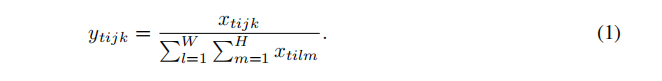

It is unclear how such as function could be implemented as a sequence of ReLU and convolutionoperator.

目前还不清楚如何将这样的函数实现为ReLU和convolutionoperator的序列。



On the other hand, the generator network of Ulyanov et al. (2016) does contain a normalizationlayers, and precisely batch normalization ones. The key difference between eq. (1) and batch normalization is that the latter applies the normalization to a whole batch of images instead for singleones:

另一方面，Ulyanov et al.(2016)的生成器网络确实包含一个归一化层和精确的批处理归一化层。式(1)与批处理归一化的关键区别在于，批处理归一化是对整批图像进行归一化，而不是对单个图像进行归一化:

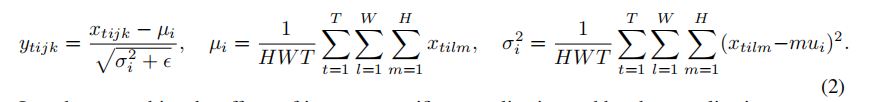

In order to combine the effects of instance-specific normalization and batch normalization, we propose to replace the latter by the instance normalization (also known as “contrast normalization”)layer:

为了结合实例归一化和批处理归一化的效果，我们建议用实例归一化(也称为“对比归一化”)层代替实例归一化:

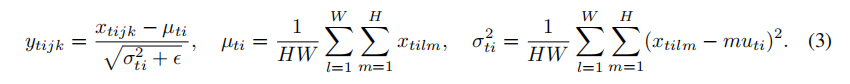

We replace batch normalization with instance normalization everywhere in the generator network g.

在生成器网络g中，我们用实例归一化替换批处理归一化。



This prevents instance-specific mean and covariance shift simplifying the learning process. Differently from batch normalization, furthermore, the instance normalization layer is applied at test timeas well.

这可以防止实例特定的平均值和协方差偏移简化学习过程。与批处理规范化不同的是，实例规范化层也在测试时应用。





# 3 Experiments

# 3实验



In this section, we evaluate the effect of the modification proposed in section 2 and replace batch normalization with instance normalization. We tested both generator architectures described in Ulyanovet al. (2016) and Johnson et al. (2016) in order too see whether the modification applies to differentarchitectures. While we did not have access to the original network by Johnson et al. (2016), wecarefully reproduced their model from the description in the paper. Ultimately, we found that bothgenerator networks have similar performance and shortcomings (fig. 5 first row).

在本节中，我们将评估第2节中提出的修改的效果，并将批处理规范化替换为实例规范化。我们测试了Ulyanovet et al.(2016)和Johnson et al.(2016)中描述的发电机架构，也为了测试修改是否适用于不同的架构。虽然我们没有访问Johnson等人(2016)的原始网络，但我们可以从文章的描述中完全复制他们的模型。最终，我们发现两个生成器网络具有相似的性能和缺点(图5第一行)。



Next, the replaced batch normalization with instance normalization and retrained the generatorsusing the same hyperparameters. We found that both architectures significantly improved by the useof instance normalization (fig. 5 second row). The quality of both generators is similar, but we foundthe residuals architecture of Johnson et al. (2016) to be somewhat more efficient and easy to use, sowe adopted it for the results shown in fig. 4.

接下来，将批处理规范化替换为实例规范化，并使用相同的超参数对生成程序进行再培训。我们发现，通过使用实例规范化，这两种体系结构都得到了显著改善(图5第二行)。这两个生成器的质量相似，但我们发现Johnson等人(2016)的残差架构更高效、更易于使用，因此我们对图4所示的结果采用了该架构。



# 4 Conclusion

# 4结论



In this short note, we demonstrate that by replacing batch normalization with instance normalizationit is possible to dramatically improve the performance of certain deep neural networks for imagegeneration. The result is suggestive, and we are currently experimenting with similar ideas forimage discrimination tasks as well.

在这篇短文中，我们证明了用实例规格化代替批处理规格化可以显著提高某些用于图像生成的深度神经网络的性能。这一结果具有启发意义，我们目前也在对类似的图像识别任务进行实验。